***SHEET 4***


CARLOS FAROUK ABDALÁ RINCÓN

TOMAS CANDEO MONTOYA

GABRIEL DAVID JIMÉNEZ MOSQUERA

In [14]:
#IMPORTS
import numpy as np
import random
import math
#import pandas as pd
import matplotlib.pyplot as plt
#import requests as rq
#from itertools import combinations

### EXERCISE 1

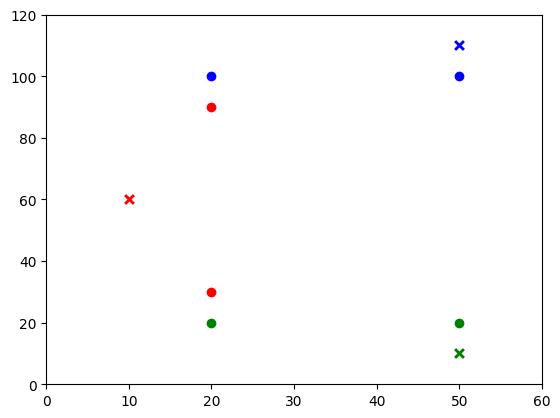

El Cluster ' red ' no tiene valores, por lo que su centroide no variara


C:\Users\Carlos Abdala\AppData\Local\Temp\ipykernel_17716\1863836953.py:34: RuntimeWarning: Mean of empty slice
  cluster_mean = np.nanmean(cluster_array, axis=0)


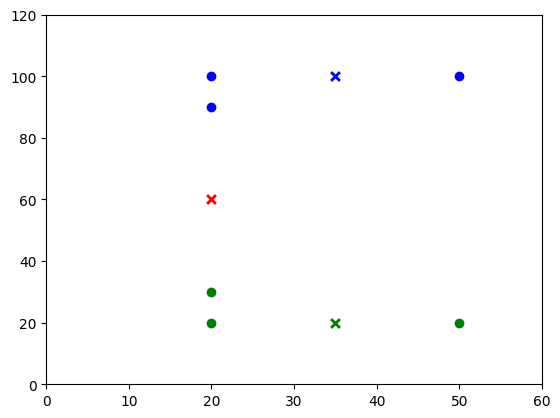

El Cluster ' red ' no tiene valores, por lo que su centroide no variara


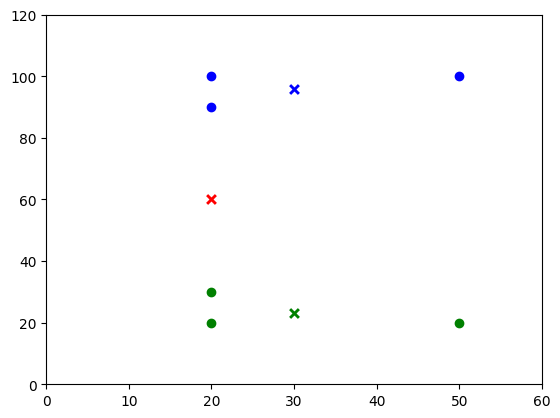

In [27]:
D_simulated=np.array([[20,20],
                     [50,20],
                     [20,30],
                     [20,90],
                     [20,100],
                     [50,100]])
mu_simulated=np.array([[10,60],
                      [50,10],
                      [50,110]])

e_calculated=0.02+1
mu_previows= [[0,0]for _ in range(len(mu_simulated))]
colors=["red","green", "blue"]

while(e_calculated>0.02):
    final_C=[]
    e_guide=0
    clusters = [[]for _ in range(len(mu_simulated))]
    plt.xlim(0, 60)
    plt.ylim(0, 120)
    plt.plot()
    for _, point in enumerate(D_simulated): 
        difference_in_point=[]

        for index, centroid in enumerate(mu_simulated):
            plt.scatter(centroid[0],centroid[1],color=colors[index],marker='x')
            difference_in_point.append(math.sqrt(np.linalg.norm(point - centroid)))
        nearest_index=np.argmin(difference_in_point)
        clusters[nearest_index].append(point)
        final_C.append(nearest_index)

    for index, cluster in enumerate(clusters):
        cluster_array = np.array(cluster)
        cluster_mean = np.nanmean(cluster_array, axis=0)
        if (not np.isnan(cluster_mean).any()):
            mu_simulated[index] = cluster_mean
            for _, point in enumerate(cluster):
                plt.scatter(point[0], point[1], color=colors[index])
        else:
            print("El Cluster '",colors[index],"' no tiene valores, por lo que su centroide no variara")

    for index, centroid_group_calculated in enumerate(mu_simulated):
        e_guide=e_guide+math.sqrt(np.linalg.norm(centroid_group_calculated - mu_previows[index]))
        e_calculated=e_guide
    mu_previows=mu_simulated.copy()
    plt.show()



En este sencillo ejemplo se puede ver como haciendo uso de K-means, la actualización de cada Cluster y su centroide generó que en el caso de el grupo de datos rojo, pasara de tener dos datos a no tener ninguno ya que desde la segunda iteración, los puntos que inicialmente pertenecian a este Cluster, pasaron a pertenecer a otros, en este caso los amarillo y verde.

### EXERCISE 2

#### EXERCISE 2.1

In [28]:
def kMeans(D,k,e,mu_given):
    t=0
    if mu_given==None:
        mu=[]
        min_Di = min(D[:, 0])
        max_Di = max(D[:, 0])
        min_Dj = min(D[:, 1])
        max_Dj = max(D[:, 1])
        for _ in range(k):
            centroid_i=random.uniform(min_Di,max_Di)
            centroid_j=random.uniform(min_Dj,max_Dj)
            mu.append([centroid_i,centroid_j])
    elif (len(mu_given)!=k):
        print("El número de centroides dado no coincide con las k's requeridas")
        return (None)
    else:
        mu=mu_given
    
    e_calculated=e+1
    mu_previows= [[0,0]for _ in range(len(mu))]

    while(e_calculated>e):
        final_C=[]
        e_guide=0
        t+=1
        clusters = [[]for _ in range(len(mu))]
        for _, point in enumerate(D): 
            difference_in_point=[]

            for _, centroid in enumerate(mu):
                difference_in_point.append(math.sqrt(np.linalg.norm(point - centroid)))
            nearest_index=np.argmin(difference_in_point)
            clusters[nearest_index].append(point)
            final_C.append(nearest_index)

        for index, cluster in enumerate(clusters):
            cluster_array=np.array(cluster)
            cluster_mean=np.mean(cluster_array,axis=0)
            mu[index]=cluster_mean

        for index, centroid_group_calculated in enumerate(mu):
            e_guide=e_guide+math.sqrt(np.linalg.norm(centroid_group_calculated - mu_previows[index]))
            e_calculated=e_guide
        mu_previows=mu.copy()

        nan_present = any(np.isnan(centroid_for_nan).any() for centroid_for_nan in mu)

        if(nan_present):
            if(mu_given!=None):
                print("Los centroides 'mu' dados generan valores inválidos, por favor pruebe con otros valores")
            else:    
                final_C, mu =kMeans(D,k,e,mu_given)
        else:
            print("La lista de centroides tras la iteración ",t," es: \n", mu)
    
    return (final_C,mu)


In [29]:
D = np.random.randint(0, 10, size=(40, 2))

C,mu_x=kMeans(D,2,0.02,None)

La lista de centroides tras la iteración  1  es: 
 [array([2.43478261, 3.43478261]), array([7.11764706, 6.41176471])]
La lista de centroides tras la iteración  2  es: 
 [array([2.        , 3.61904762]), array([7.10526316, 5.89473684])]
La lista de centroides tras la iteración  3  es: 
 [array([1.85, 3.6 ]), array([7. , 5.8])]
La lista de centroides tras la iteración  4  es: 
 [array([1.85, 3.6 ]), array([7. , 5.8])]


#### EXERCISE 2.2

In [30]:
def DBSCAN (D, epsilon, minpts):
    
    def Density_Connected(x, k):
        for _,neighbor_index in enumerate(Ne(x, D, epsilon)):
            if id[neighbor_index] == 0:
                id[neighbor_index] = k
                if any((neighbor_index == core_point).all() for core_point in core_points):
                    Density_Connected(neighbor_index, k)
    
    k = 0 # cluster id
    id  = np.array([0]*len(D)) # cluster id
    core_points = []
    noise_points = []
    border_points = []

    for index, point in enumerate(D):
        neighborhood = Ne(point, D, epsilon)
        if len(neighborhood) >= minpts:
            id[index]=0
            core_points.append(point)

    for core_index, core_point in enumerate(core_points):
        if id[core_index] == 0:
            k += 1
            id[core_index] = k
            Density_Connected(core_point, k)
    
    clusters = {i+1: {tuple(D[j]) for j in range(len(D)) if id[j] == i+1} for i in range(k)} 
    noise_points = {tuple(D[j]) for j in range(len(D)) if id[j] == 0}
    border_points = {tuple(D[j]) for j in range(len(D)) if any((D[j] == core_point).all() for core_point in core_points) and any((D[j] == noise_point).all() for noise_point in noise_points)}  

    return clusters, core_points, noise_points, border_points, id


def Ne (xi, D, epsilon):
    ne = []
    for point_index, xj in enumerate(D):
        if (np.linalg.norm(xi-xj) <= epsilon):
            ne.append(point_index)
    return ne 

X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

clusters, core_points, noise_points, border_points, id= DBSCAN(X, 3, 2)

print("Clusters: ", clusters)
print("Core Points: ", core_points)
print("Noise Points: ", noise_points)
print("Border Points: ", border_points)
print("id: ", id)

Clusters:  {1: {(2, 3), (1, 2), (2, 2)}, 2: {(8, 7), (8, 8)}}
Core Points:  [array([1, 2]), array([2, 2]), array([2, 3]), array([8, 7]), array([8, 8])]
Noise Points:  {(25, 80)}
Border Points:  set()
id:  [1 1 1 2 2 0]


### EXERCISE 3

#### EXERCISE 3.1

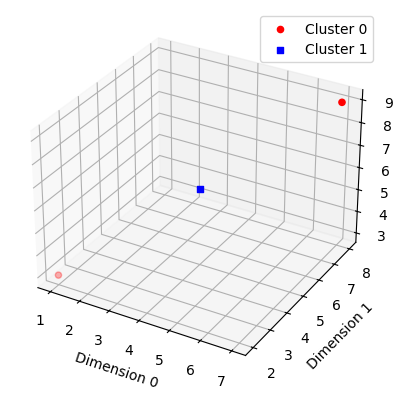

<Axes3D: xlabel='Dimension 0', ylabel='Dimension 1', zlabel='Dimension 2'>

In [16]:

def plotClusters(A, C, dimX, dimY, dimZ=None, ax=None):
    if ax is None:
        if dimZ is None:
            fig, ax = plt.subplots()
        else:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
    else:
        fig = ax.get_figure()

    clusters = set(C)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
    markers = ['o', 's', 'v', '^', 'D', 'P', 'X', '*', '+', 'h']


    for cluster in clusters:
        indices = [i for i, c in enumerate(C) if c == cluster]
        cluster_points = A[indices]
        if dimZ is None:
            ax.scatter(cluster_points[:, dimX], cluster_points[:, dimY], color=colors[cluster % len(colors)], marker=markers[cluster % len(markers)], label=f'Cluster {cluster}')
        else:
            ax.scatter(cluster_points[:, dimX], cluster_points[:, dimY], cluster_points[:, dimZ], color=colors[cluster % len(colors)], marker=markers[cluster % len(markers)], label=f'Cluster {cluster}')

    if dimZ is None:
        ax.set_xlabel(f'Dimension {dimX}')
        ax.set_ylabel(f'Dimension {dimY}')
    else:
        ax.set_xlabel(f'Dimension {dimX}')
        ax.set_ylabel(f'Dimension {dimY}')
        ax.set_zlabel(f'Dimension {dimZ}')

    ax.legend()
    plt.show()

    return ax

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C = np.array([0, 1, 0])
dimX = 0
dimY = 1
dimZ = 2

plotClusters(A, C, dimX, dimY, dimZ)

#### EXERCISE 3.2

In [32]:
#Tha fuck is that?!!